In [1]:
from sklearn.tree import DecisionTreeRegressor
import numpy

In [19]:
x = numpy.random.rand(10**6)

In [20]:
%%time
for _ in range(1000):
    # numpy.multiply(1.001, x, out=x)
    y = (-4.1) * x

CPU times: user 697 ms, sys: 14 μs, total: 697 ms
Wall time: 699 ms


In [7]:
X = numpy.array([
    [ 2.38, 3.13],
    [-0.87, 0.24],
    [ 3.42, 2.74],
    [ 1.43, 2.57],
    [ 0.86, 0.26]
])
y = numpy.array([0.784, 0.654, 1.125, 2.010, 0.614])
w = numpy.array([0.622, 1.356, 1.206, 0.912, 1.424])

In [17]:
import numpy as np

def abs_error_of_a_leaf(y, w):
    return min((np.abs(y - yi) * w).sum() for yi in y)

def abs_error_of_leaves(leaves, y, w=None):
    if w is None:
        w = numpy.ones(leaves.size, dtype=int)
    return sum(abs_error_of_a_leaf(y[leaves == i], w[leaves == i]) for i in np.unique(leaves))

X = np.array([
    [1, 1],
    [2, 2],
    [3, 3],
    [4, 4],
    [5, 5],
])
y = np.array([0.6, 0.6, 2.0, 0.7, 1.1])
w = np.array([3., 3., 2., 1., 2.])

In [19]:
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 1, 3, 1, 2])
w = np.array([3, 3, 2, 1, 2])

X = numpy.repeat(X, w).reshape(-1, 1)
y = numpy.repeat(y, w)
X, y

(array([[1],
        [1],
        [1],
        [2],
        [2],
        [2],
        [3],
        [3],
        [4],
        [5],
        [5]]),
 array([1, 1, 1, 1, 1, 1, 3, 3, 1, 2, 2]))

In [21]:
reg = DecisionTreeRegressor(max_depth=1, criterion='absolute_error')
sk_leaves = reg.fit(X, y).apply(X)
print("leaves:", sk_leaves, "total abs error:", abs_error_of_leaves(sk_leaves, y))

expected_leaves = np.array([1, 1]*3 + [2, 2, 2, 2, 2])
print("total abs error:", abs_error_of_leaves(expected_leaves, y))

leaves: [1 1 1 1 1 1 2 2 2 2 2] total abs error: 3
total abs error: 3


In [15]:
reg = DecisionTreeRegressor(max_depth=1, criterion='absolute_error')
sk_leaves = reg.fit(X, y, sample_weight=w).apply(X)
print("leaves:", sk_leaves, "total abs error:", abs_error_of_leaves(sk_leaves, y, w))

expected_leaves = np.array([1, 1, 2, 2, 2])
print("total abs error:", abs_error_of_leaves(expected_leaves, y, w))

ValueError: sample_weight.shape == (5,), expected (11,)!

In [ ]:
reg.tree_.impurity, []

array([0.54545455, 0.44444444, 0.        ])

[4.  4.5 4. ]


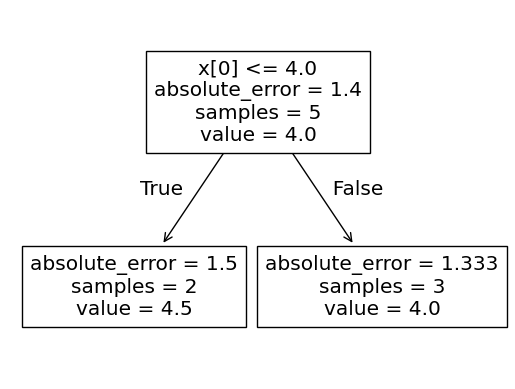

In [17]:
# Test MAE where all sample weights are uniform:
import numpy as np
dt_mae = DecisionTreeRegressor(
    random_state=0, criterion="absolute_error", max_leaf_nodes=2
)
dt_mae.fit(X=[[3], [5], [3], [8], [5]], y=[6, 7, 3, 4, 3], sample_weight=np.ones(5))
print(dt_mae.tree_.value.ravel())
from sklearn.tree import plot_tree
plot_tree(dt_mae);